<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Exploration](#4)

[5. Baseline Modeling 1.0](#5)


<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

- Version 1 (08/01/2023)
    * EDA 
    
        
<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold, GroupKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e21/sample_submission.csv')
original = pd.read_csv('../input/dissolved-oxygen-prediction-in-river-water/train.csv')

print('The dimension of the train dataset is:', train.shape)
print('The dimension of the original train dataset is:', original.shape)

The dimension of the train dataset is: (3500, 37)
The dimension of the original train dataset is: (147, 37)


In [3]:
train.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7,NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO3_1,NO3_2,NO3_3,NO3_4,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.00000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,0.397956,1.036098,7.074487,14.709377,0.466592,0.540403,0.08223,0.113137,0.097065,0.724153,1.190117,0.065045,0.230348,1.944999,2.184933,4.351799,10.866664,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,0.452237,0.595943,5.279023,51.402198,0.311071,0.288486,0.10647,0.198144,0.082717,0.352611,0.634958,0.075737,0.213995,1.691173,1.496552,4.329417,6.003792,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,0.020000,0.120000,0.252000,0.848000,0.052000,0.052000,0.00000,0.006000,0.000000,-4.000000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.515000,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,0.200000,0.650000,3.850000,8.415000,0.310000,0.429000,0.03800,0.040000,0.040000,0.560000,0.848000,0.056000,0.071000,0.790000,1.205000,2.020000,5.240000,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,0.245000,0.698000,5.560000,12.175000,0.380000,0.429000,0.05800,0.060000,0.074000,0.805000,1.075000,0.056000,0.150000,1.600000,1.855000,2.095000,7.980000,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,0.405000,1.640000,10.090000,16.645000,0.429000,0.440000,0.07500,0.095000,0.134000,0.902000,1.454000,0.071000,0.191000,2.400000,2.600000,4.960000,16.925000,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,3.600000,14.515000,46.800000,3026.000000,2.680000,2.600000,0.95000,2.347000,2.050000,3.980000,8.400000,1.560000,2.120000,28.500000,10.580000,21.700000,29.030000,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


There are not missing values in the `train` dataset. 

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1>

First, we start by visualizing `target`, the variable of interest.

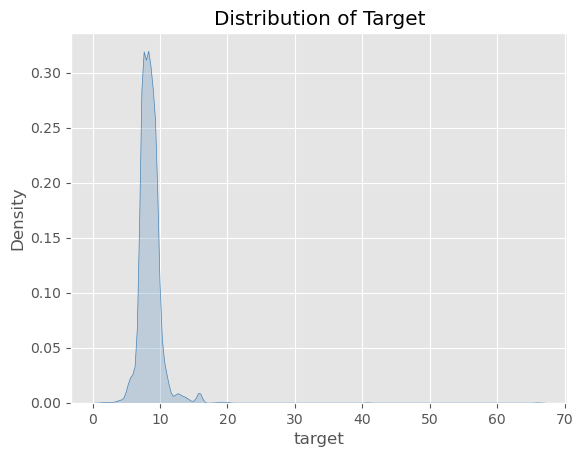

In [4]:
sns.kdeplot(data = train, x = 'target', fill = True, color = 'steelblue').set_title('Distribution of Target');

From the above chart, we can see the following:

- There is one big peak around 8.
- There is one small peak around 15.
- There are a two `target` values greater than 20.

Next, we explore relationships among `target` and the other features.

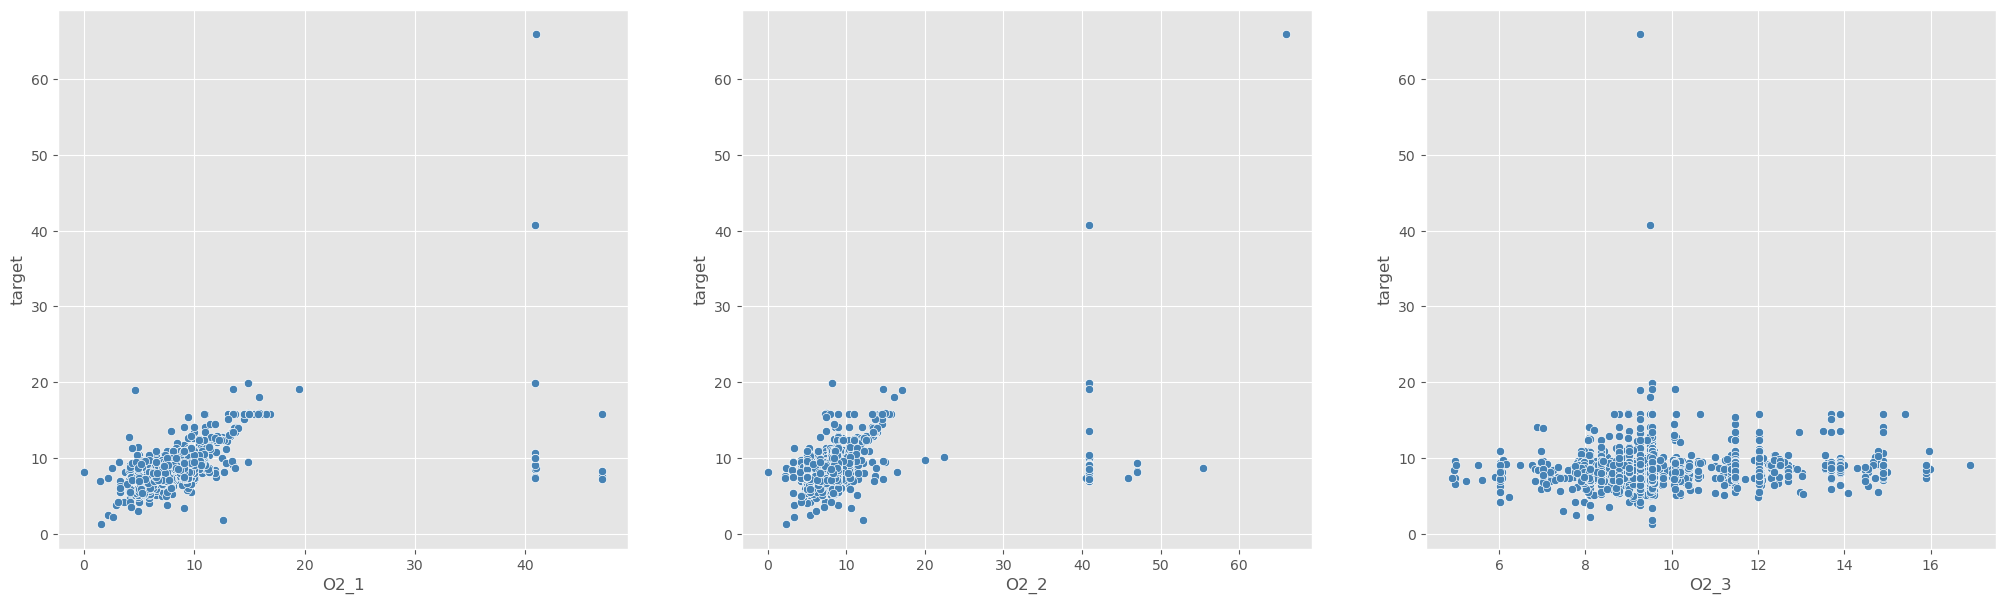

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'O2_2', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'O2_3', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some observations with `O2_1` values greater than 40 (different from other values).
- For `O2_1` values less than 20, the relationship between `O2_1` and `target` seems to be roughly linear.
- There are some observations with `O2_2` values greater than 40 (different from other values).

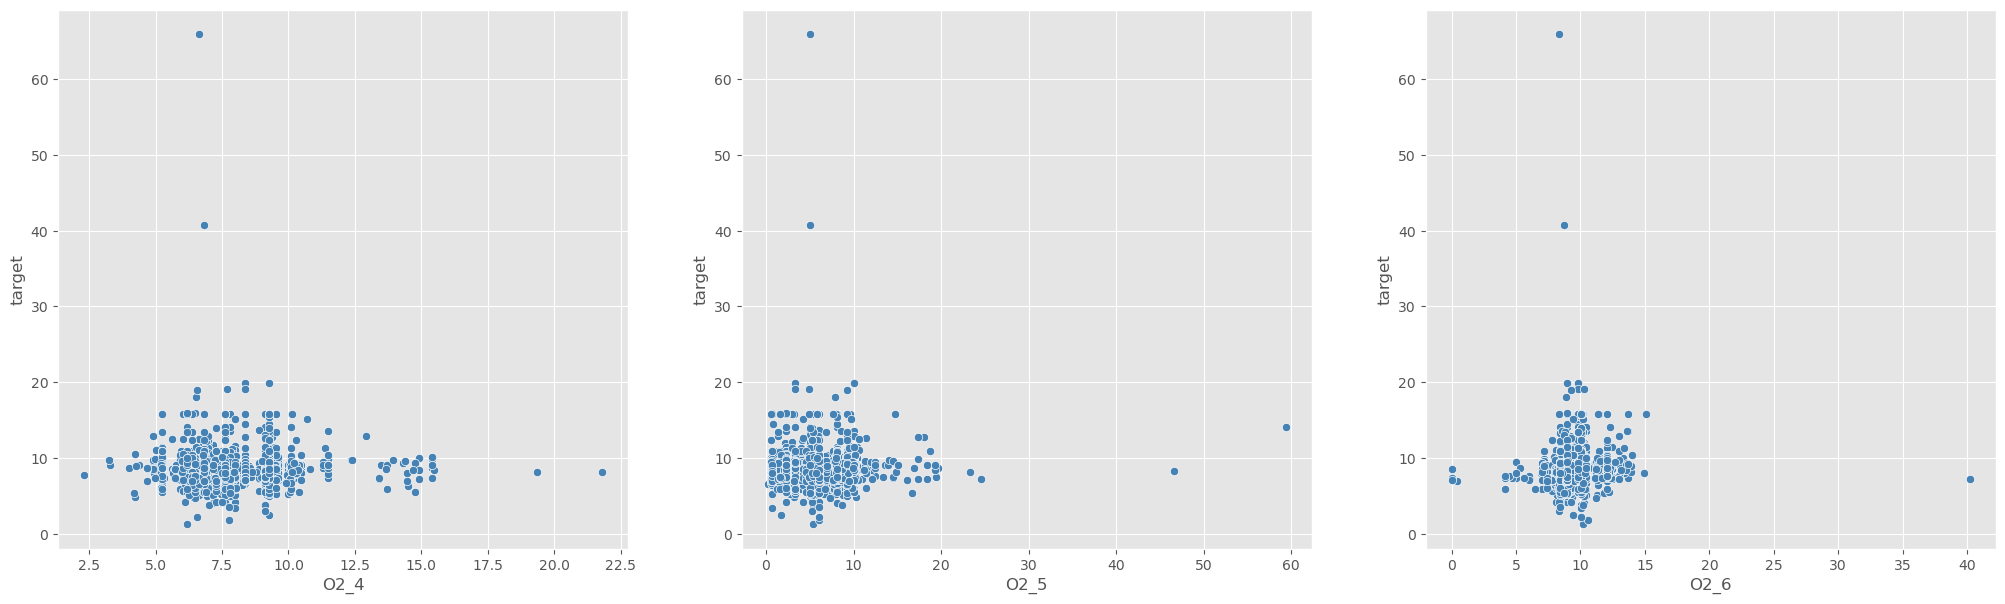

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'O2_5', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'O2_6', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some *outliers* in `O2_4`, `O2_5`, and `O2_6`. 


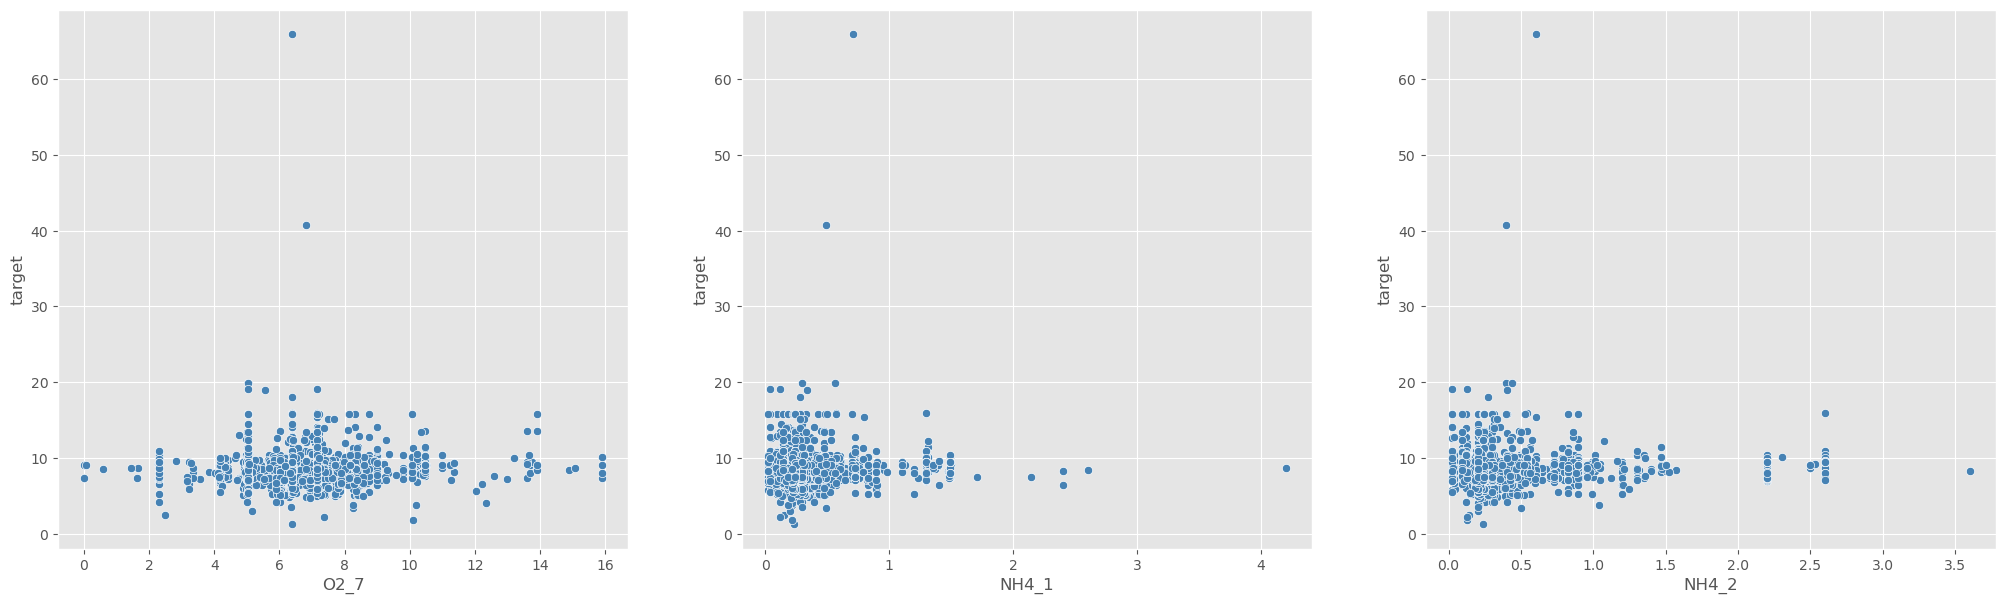

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'O2_7', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_1', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NH4_2', y = 'target', color = 'steelblue');

From the above, we see the following:

- There are some *outliers* in `NH4_1` and `NH4_2`.

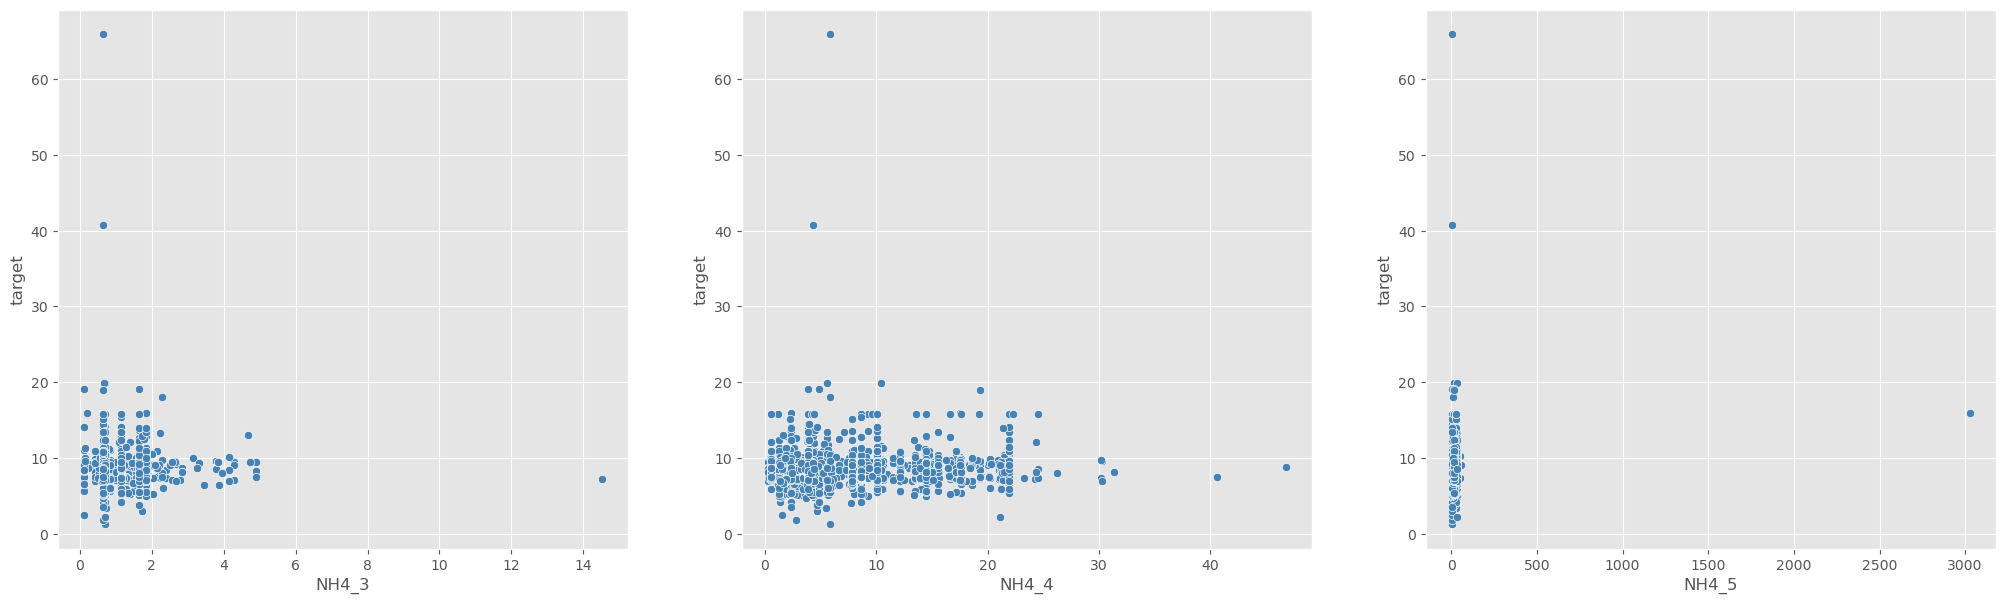

In [8]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NH4_3', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_4', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NH4_5', y = 'target', color = 'steelblue');

From the above, we see the following:

- There is an outlier in `NH4_3`.
- There are some outliers in `NH4_4`.
- There is an outlier in `NH4_5`.

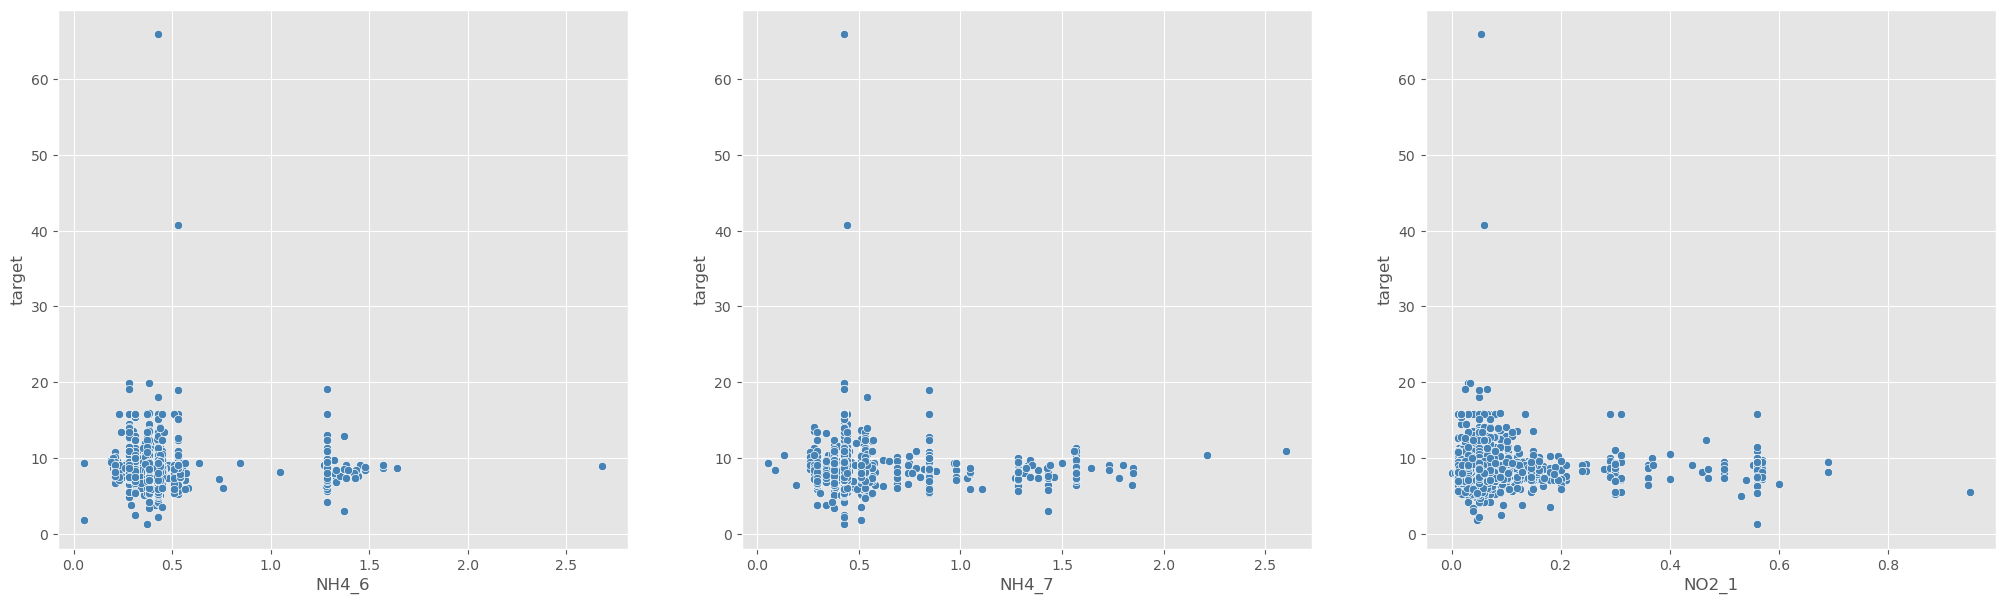

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NH4_6', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NH4_7', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO2_1', y = 'target', color = 'steelblue');

From the above, we see the following:

- It is seems that there are two groups of observations in `NH4_6`. Also, there is an outlier.
- There are a couple of outliers in `NH4_7` and `NO2_1`. 

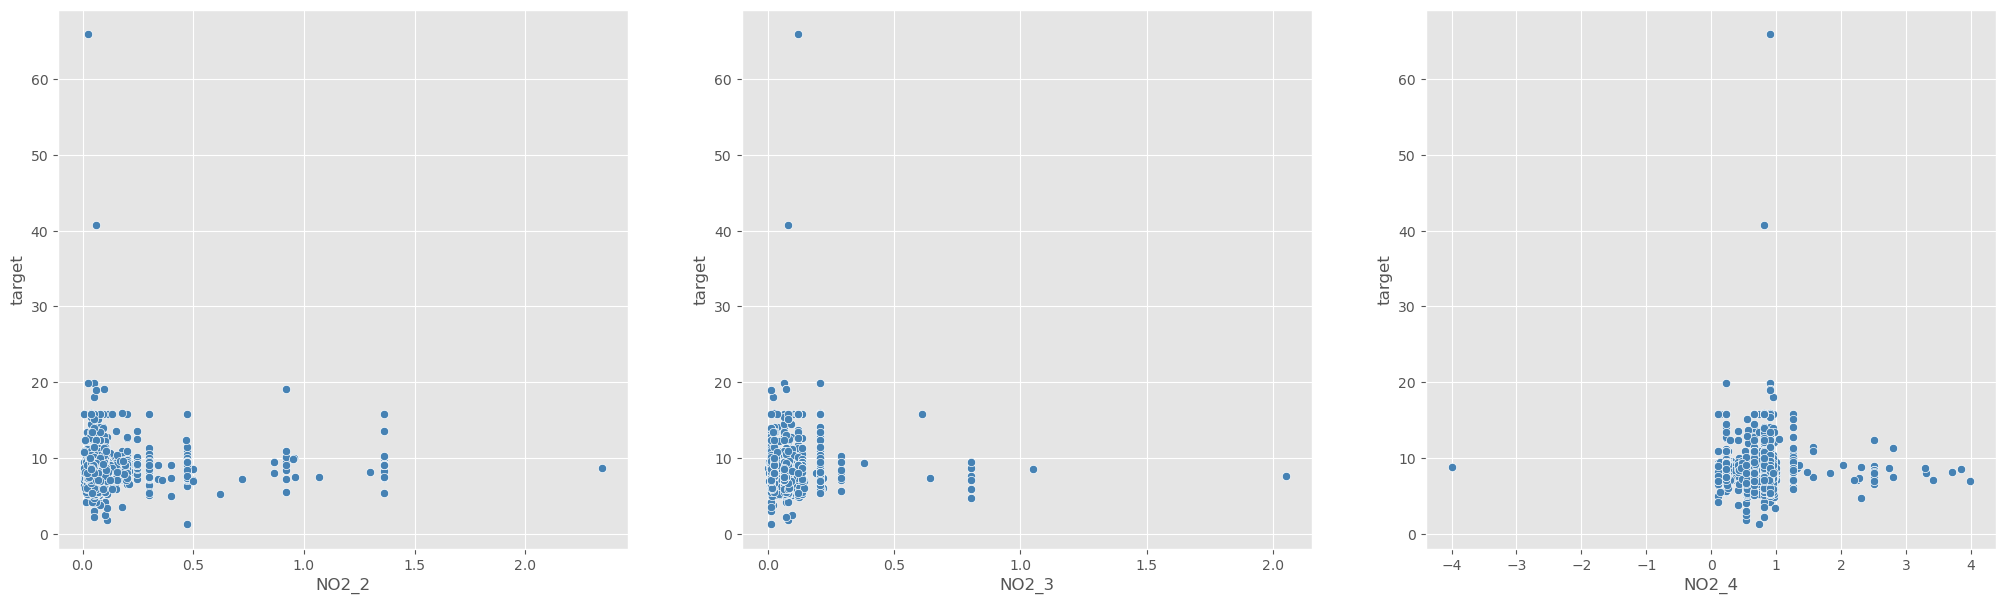

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.scatterplot(ax = axes[0], data = train, x = 'NO2_2', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[1], data = train, x = 'NO2_3', y = 'target', color = 'steelblue')
sns.scatterplot(ax = axes[2], data = train, x = 'NO2_4', y = 'target', color = 'steelblue');

From the above, we see the following:

- There is an outlier in `NO2_2`.
- There are a couple of outliers in `NO2_3`.
- There is an outlier in `NO2_4`.

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>

In this section, we attempt our first submission by removing a few outliers from the data.

In [11]:
train = train[train['target'] < 40]
train = train[train['O2_1'] < 40]
train = train[train['O2_2'] < 40]
train = train[train['O2_5'] < 40]
train = train[train['O2_6'] < 40]
train = train[train['NH4_1'] < 4]
train = train[train['NH4_2'] < 3.5]
train = train[train['NH4_3'] < 14]
train = train[train['NH4_4'] < 40]
train = train[train['NH4_5'] < 3000]
train = train[train['NH4_6'] < 2.5]
train = train[train['NH4_7'] < 2]
train = train[train['NO2_4'] > 0]

In [12]:
train.to_csv('dummy_submision.csv', index = False)